# Creacion y prueba de la implementacion del algoritmo de descenso de gradiente

Se debe probara el algoritmo usando un dataset de 3 columnas y 1000 filas para las cuales se aplicara regresion sobre una de las variables generando una funcion de regresion de la forma $f(x) = w_1 x_1 + w_2 x_2 + w_0$.

In [1]:
import pandas as pd
import numpy as np
from Prediction_model import Prediction_model
from sklearn.model_selection import train_test_split

In [2]:
training_df = pd.DataFrame(columns=['var_a', 'var_b', 'var_c'])

n_values = 1000
#Coeficientes que deberia predecir el modelo como vector de pesos
training_df['var_a'] = np.random.rand(n_values)
training_df['var_b'] = np.random.rand(n_values)
training_df['var_c'] = np.random.rand(n_values)
training_df

,var_a,var_b,var_c
0,0.817018,0.552012,0.668079
1,0.227994,0.251314,0.996479
2,0.911823,0.017211,0.996787
3,0.987951,0.951849,0.175457
4,0.110160,0.279009,0.557603
...,...,...,...
995,0.347605,0.188704,0.056271
996,0.705548,0.631933,0.563482
997,0.158915,0.063900,0.573250
998,0.553425,0.461631,0.381618


Number of iterations: 80000
0    0.497839
1    0.025140
2   -0.041427
dtype: float64


<Figure size 640x1000 with 0 Axes>

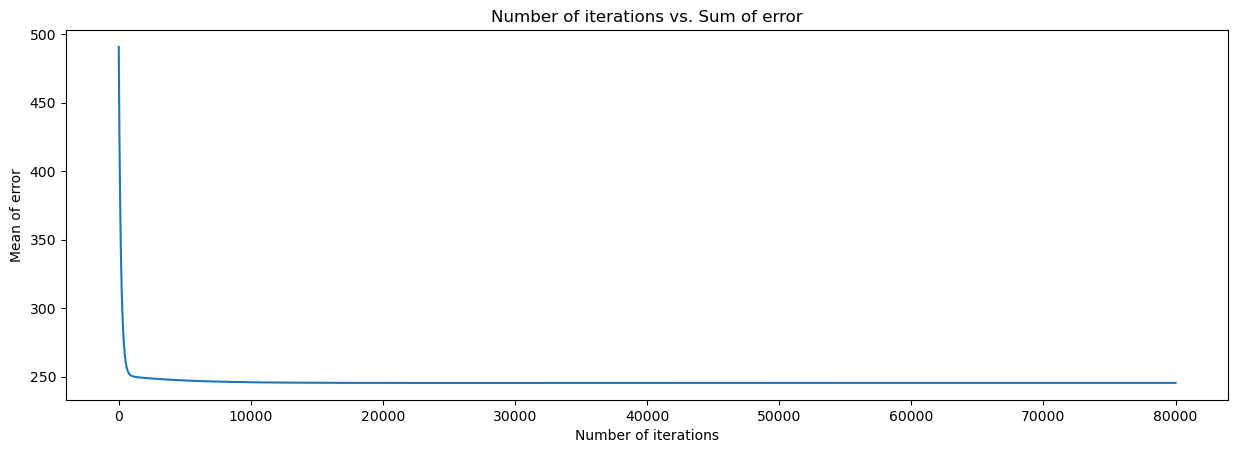

In [3]:
test = Prediction_model(training_set = training_df, 
                        dep_var='var_c', 
                        ind_vars=['var_a', 'var_b'])
test.train_model(max_iter=80000)

Number of iterations: 50000
0    -0.029903
1     0.082975
2    -0.021289
3     0.181797
4    -0.060845
5    -0.031590
6     0.001687
7    -0.013863
8    -0.019346
9    -0.017803
10   -0.000309
11    0.000430
12    0.021659
13   -0.000671
dtype: float64


<Figure size 640x1000 with 0 Axes>

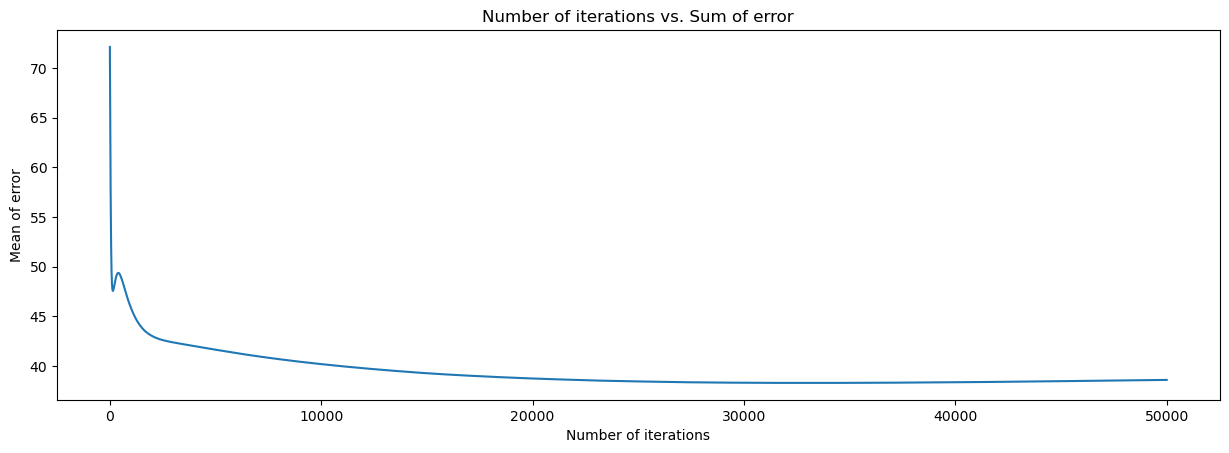

Resumen de error del modelo:
	Valor máximo del error: 0.3720040684846529
	Valor mínimo del error: -0.08177145514587285
	Media del error: 4.978055219327134e-05
	Mediana del error: -0.0013467799734045577
	Suma total del error: 0.018667707072476752


In [20]:
df_not_null_norm = pd.read_csv('datasets/CarDekho_not_null_normalize.csv')
df_not_null_cat_norm = pd.read_csv('datasets/CarDekho_not_null_cat_norm.csv')
dep_var = 'Price'
makers = list(df_not_null_norm['Make'].unique())
fuel_types = list(df_not_null_norm['Fuel Type'].unique())
owners = list(df_not_null_norm['Owner'].unique())
ind_vars = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Seating Capacity','Manual', 'Automatic'] + fuel_types
x_train, x_test, y_train, y_test = train_test_split(df_not_null_cat_norm[ind_vars], df_not_null_cat_norm[dep_var], test_size=0.2, random_state=0)

train_set = pd.DataFrame()
train_set[dep_var] = y_train
train_set[ind_vars] = x_train

model_not_null = Prediction_model(training_set=train_set,
                                  dep_var=dep_var,
                                  ind_vars=ind_vars)

model_not_null.train_model(max_iter=50000)

test_set = pd.DataFrame()
test_set[dep_var] = y_test
test_set[ind_vars] = x_test
model_not_null.test_model(test_set=test_set)